<a href="https://colab.research.google.com/github/Malbasahi/Diabetes_Patients/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [157]:
# Load the dataset
dataset = pd.read_csv('/content/diabetes.csv')

In [158]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [159]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [160]:
# Data Cleaning
# Replace zero values with the mean of non-zero values for specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'BMI']
for col in cols_with_zeros:
    non_zero_mean = dataset[dataset[col] > 0][col].mean()
    dataset.loc[dataset[col] == 0, col] = non_zero_mean

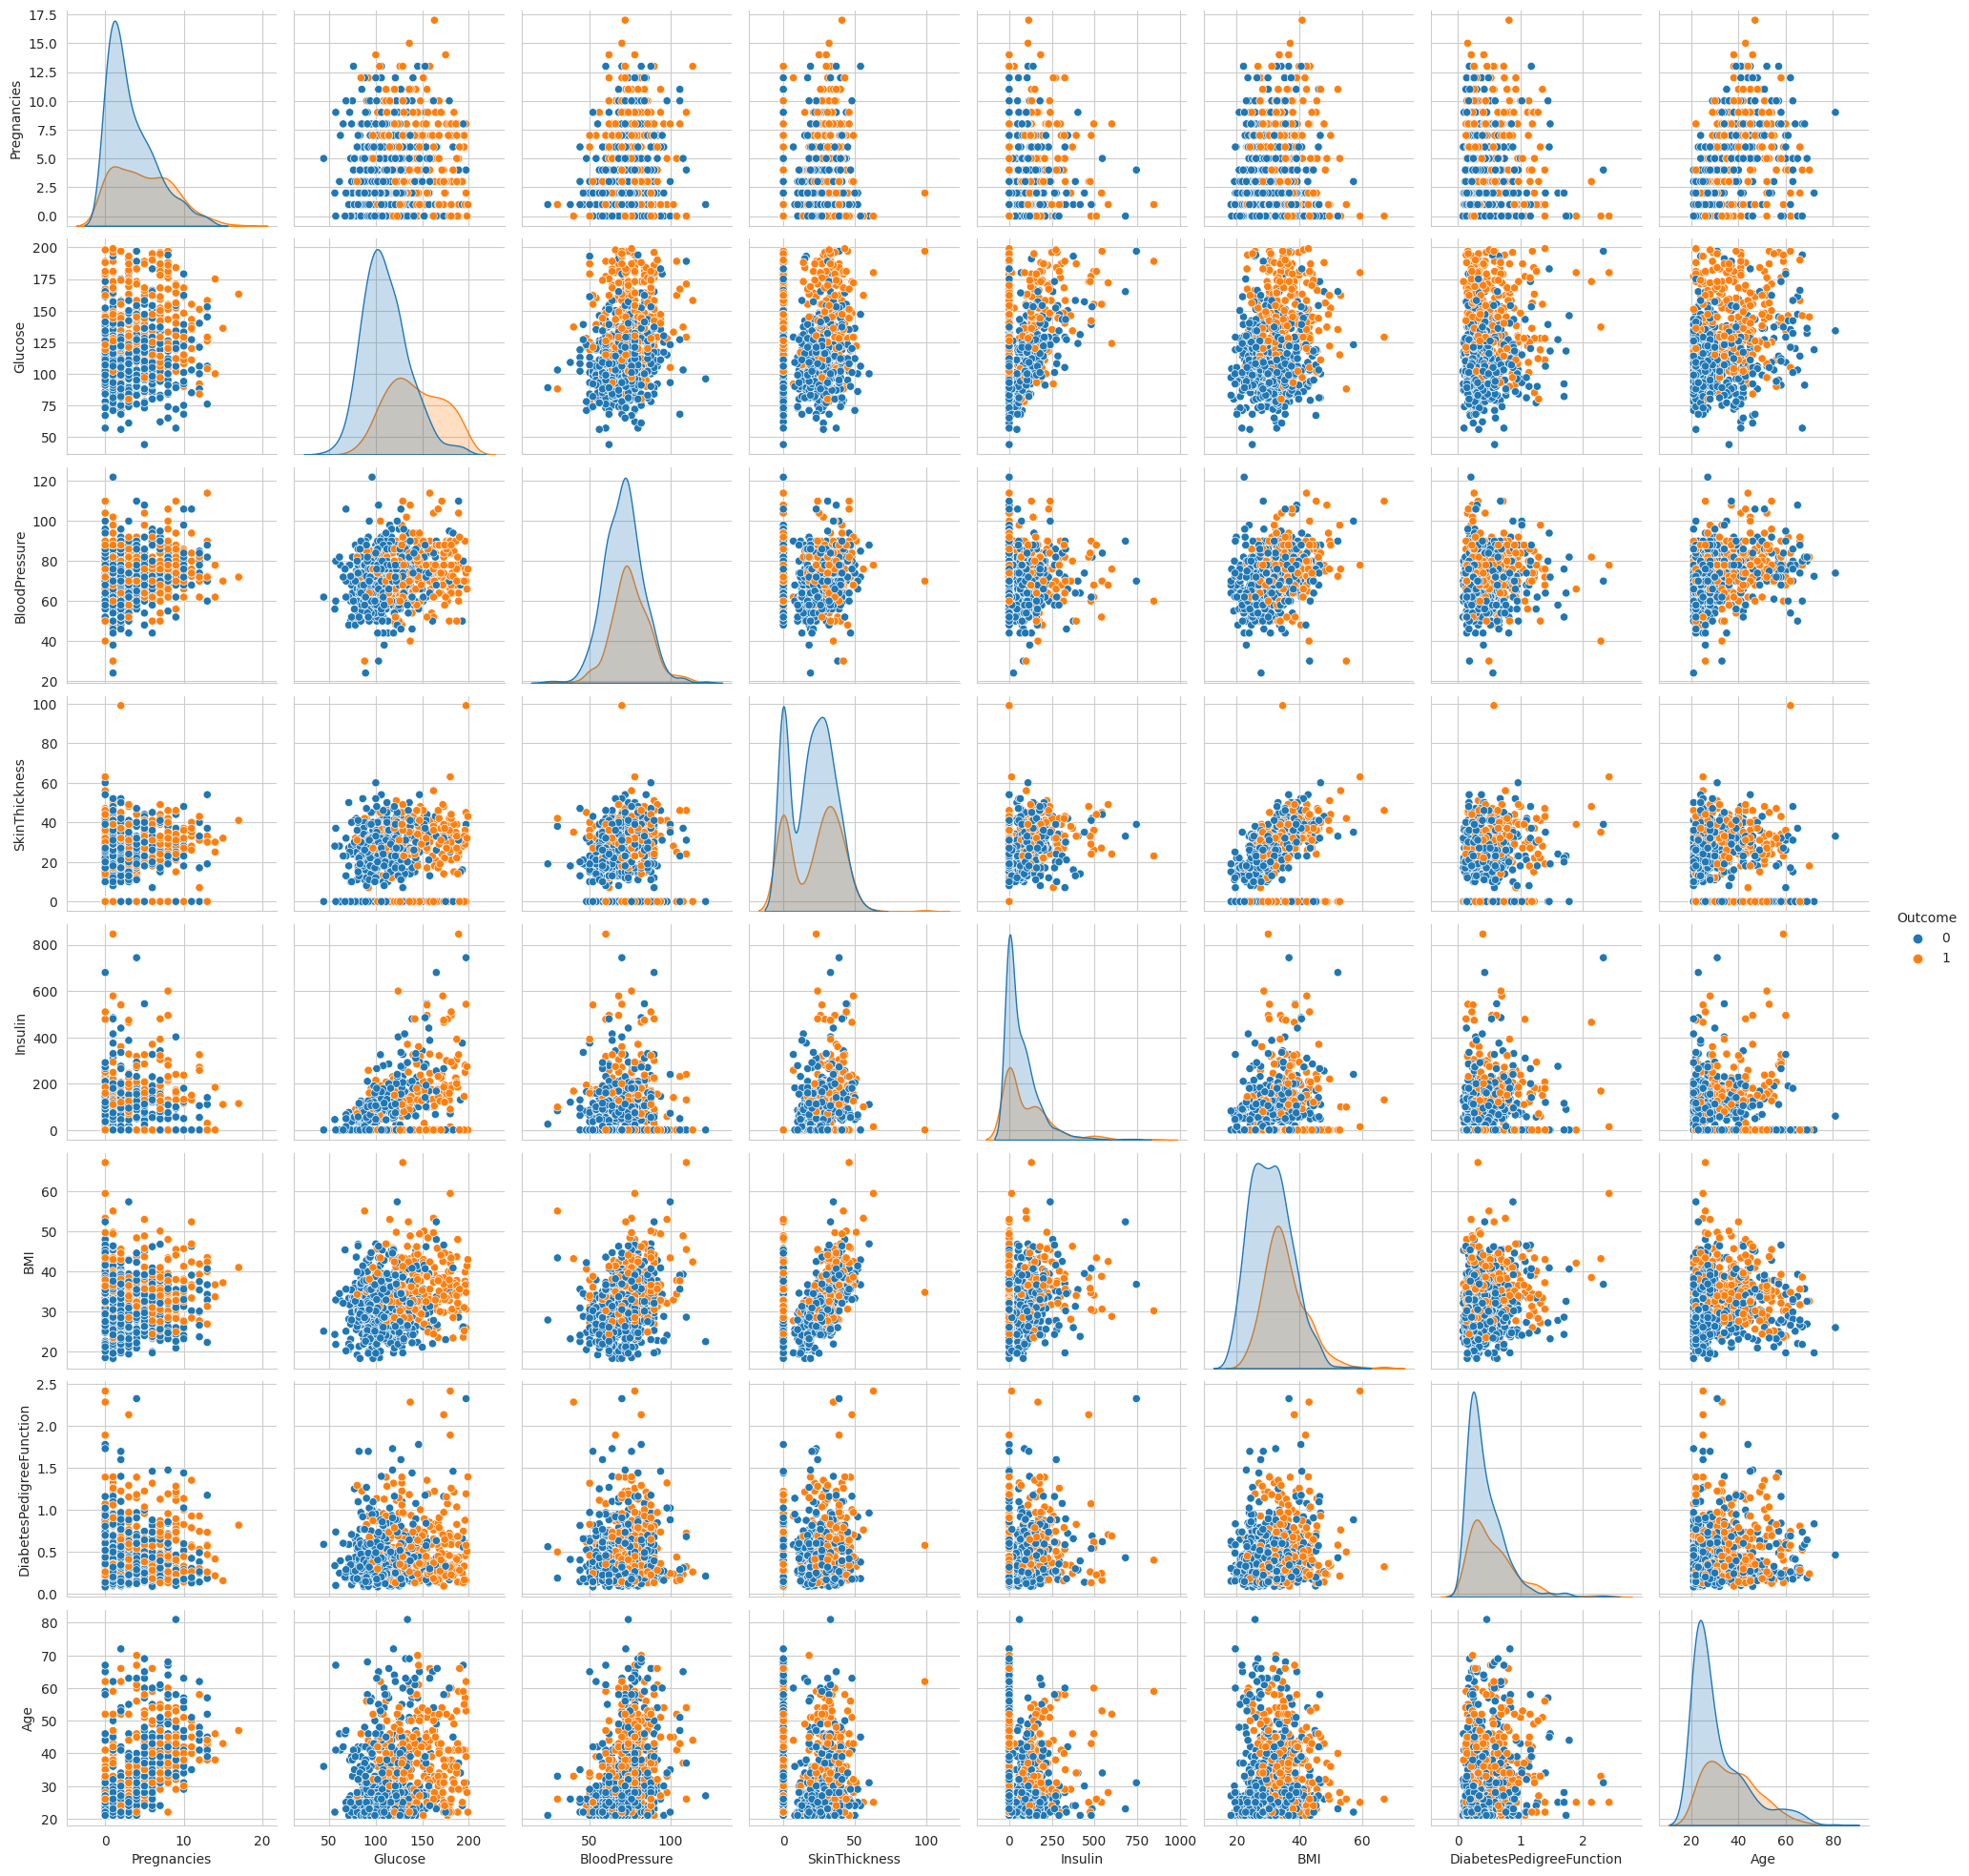

In [161]:
sns.pairplot(dataset, hue='Outcome')
plt.show()

In [162]:
# Check for missing values
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [163]:
# Feature Engineering
# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

dataset['BMI_Category'] = dataset['BMI'].apply(categorize_bmi)

# Categorize Age
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 45:
        return 'Middle-aged'
    else:
        return 'Senior'

dataset['Age_Group'] = dataset['Age'].apply(categorize_age)

In [164]:
# Feature Scaling
scaler = StandardScaler()
numeric_columns = ['Glucose', 'BloodPressure', 'BMI']
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

In [165]:
# One-Hot Encoding for categorical variables
dataset = pd.get_dummies(dataset, columns=['BMI_Category', 'Age_Group'], drop_first=True)

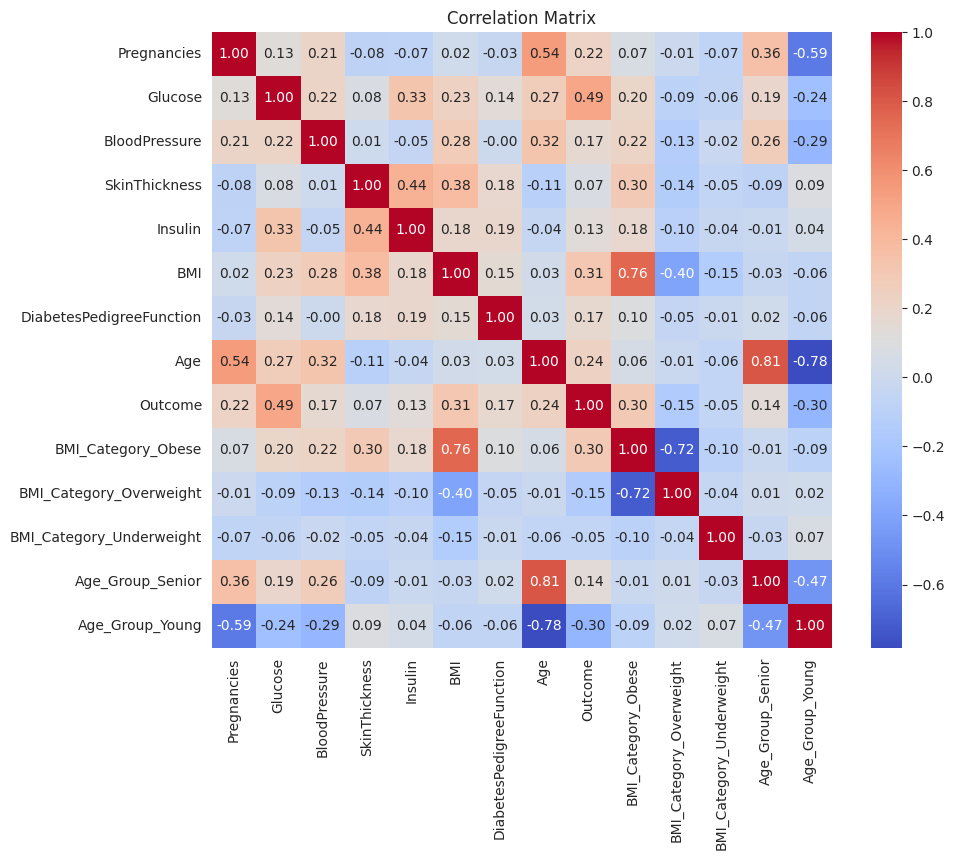

In [166]:
# Correlation matrix to visualize feature correlations
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

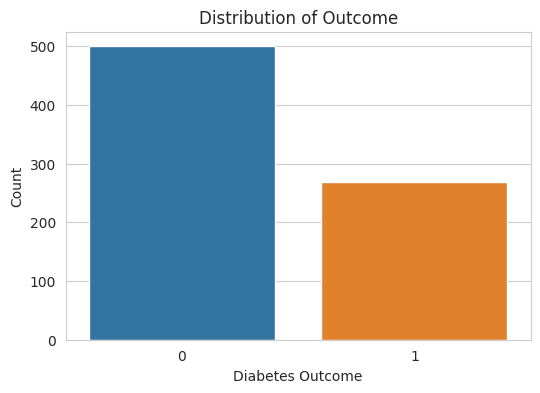

In [167]:
# Bar plot for Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset)
plt.title('Distribution of Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.show()

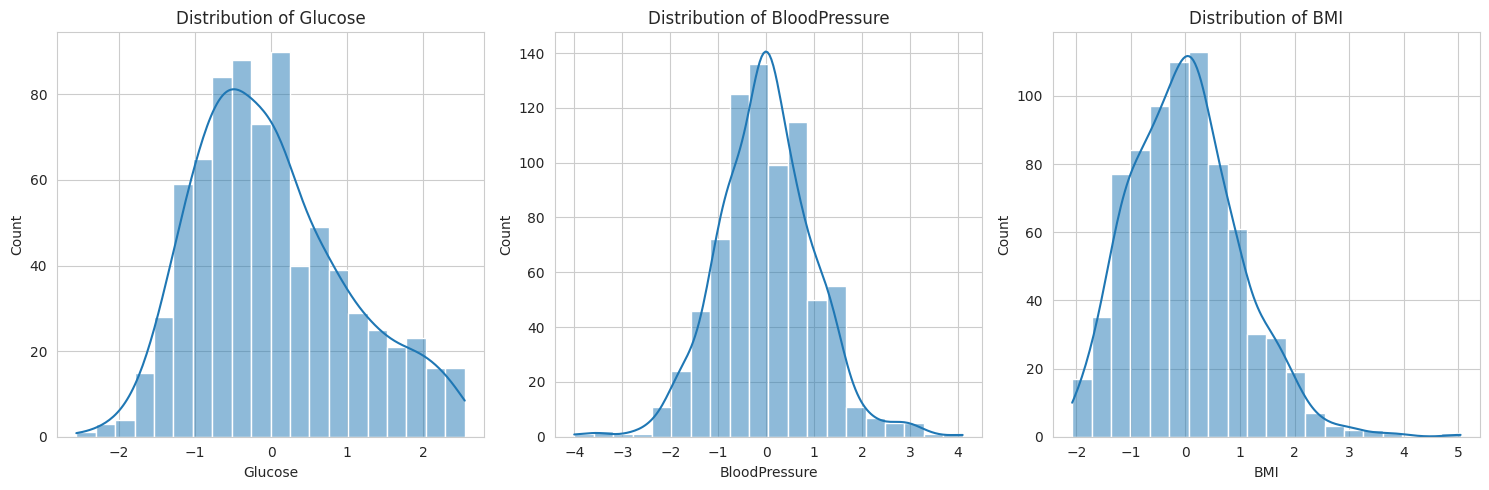

In [209]:
# Define the numeric features to analyze
numeric_features = ['Glucose', 'BloodPressure', 'BMI']

# Create histograms for each numeric feature side by side
fig, axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.histplot(dataset[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Ensure proper spacing
plt.show()

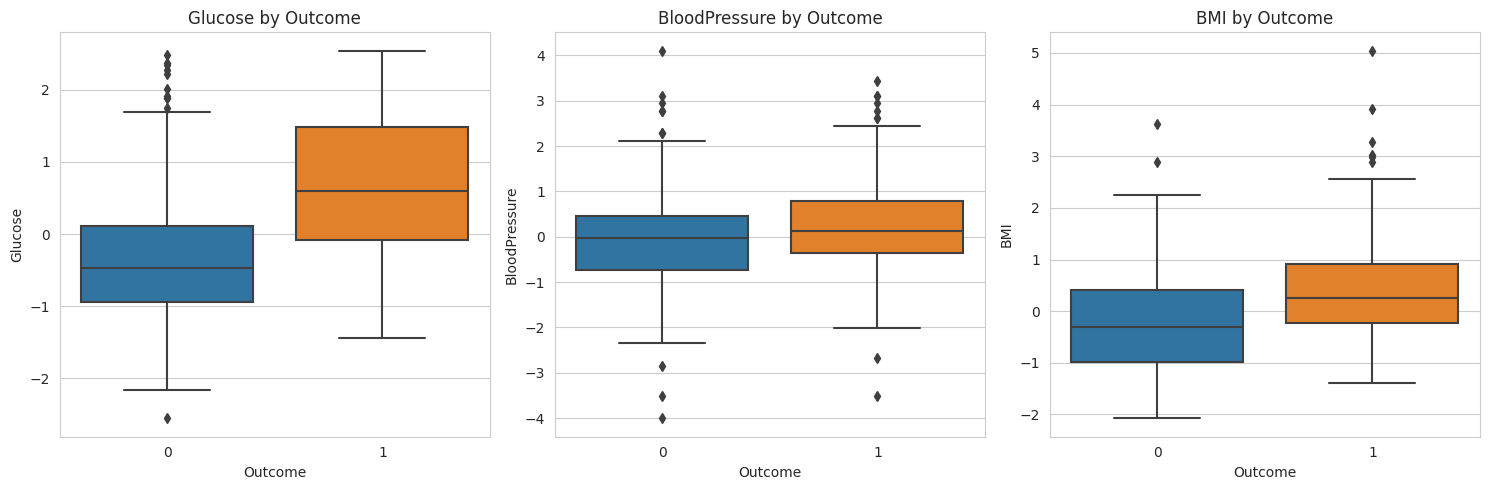

In [210]:
# Create boxplots for each numeric feature side by side
fig, axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    sns.boxplot(x='Outcome', y=feature, data=dataset, ax=axes[i])
    axes[i].set_title(f'{feature} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(feature)

plt.tight_layout()  # Ensure proper spacing
plt.show()

In [195]:
# Split the data into features (X) and target (y)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [196]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# Initialize and train multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    'Logistic Regression': LogisticRegression(C=1, random_state=42),
    'SVM': SVC(C=1, kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [198]:
accuracies = {}  # Store accuracy results
reports = {}  # Store classification reports
confusion_matrices = {}  # Store confusion matrices

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
    reports[model_name] = report
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


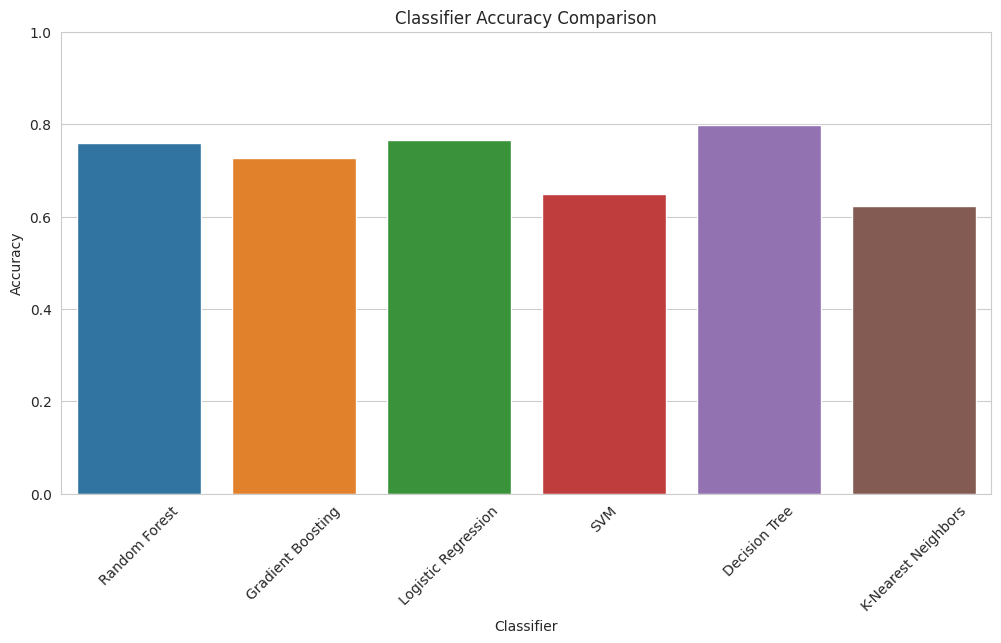

In [206]:
# Plot the accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.show()

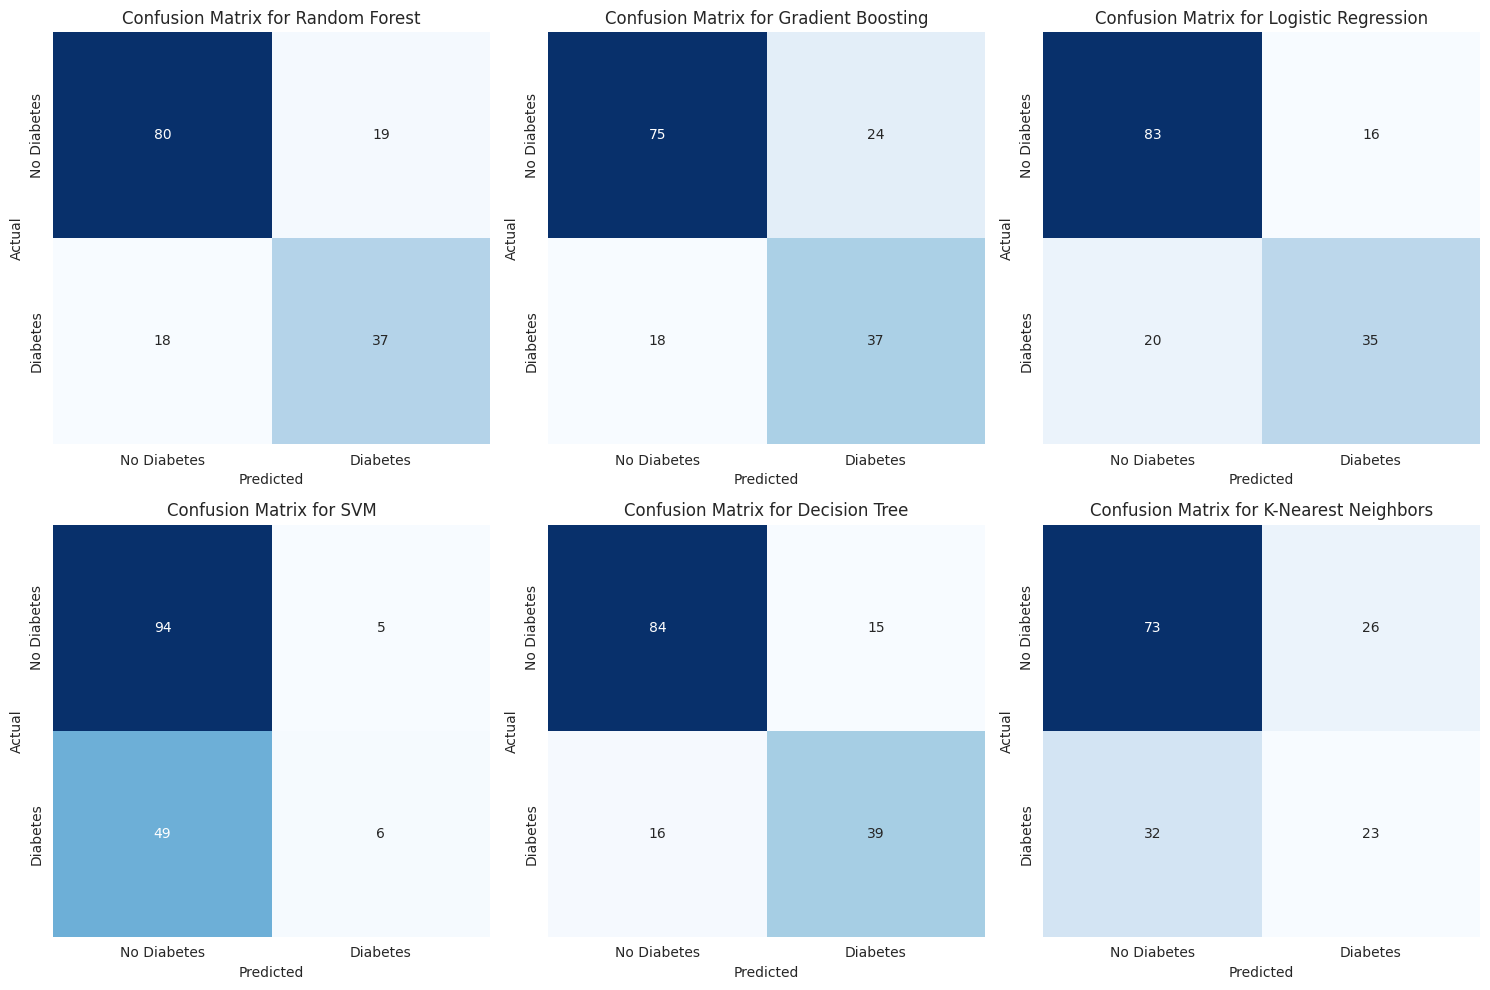

In [200]:
# Display confusion matrices as heatmaps
plt.figure(figsize=(15, 10))
for model_name, cm in confusion_matrices.items():
    plt.subplot(2, 3, list(classifiers.keys()).index(model_name) + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [205]:
# Select the best model based on accuracy
best_model = max(accuracies, key=accuracies.get)
print("Best Model:", best_model)

# Display classification reports for all models
for model_name, report in reports.items():
    print(f"{'='*40}\n{model_name}\n{'='*40}\n{report}\n")

Best Model: Decision Tree
Random Forest
              precision    recall  f1-score   support

 No Diabetes       0.82      0.81      0.81        99
    Diabetes       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Gradient Boosting
              precision    recall  f1-score   support

 No Diabetes       0.81      0.76      0.78        99
    Diabetes       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Logistic Regression
              precision    recall  f1-score   support

 No Diabetes       0.81      0.84      0.82        99
    Diabetes       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74     

In [202]:
# Train the best model (without cross-validation)
best_model = classifiers[best_model]
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Display the final result for the best model
print(f"Final Result for the Best Model ({best_model}):\n")
print(f"Accuracy (Test Set): {test_accuracy:.2f}\n")

# Display the classification report and confusion matrix for the best model
final_report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
final_cm = confusion_matrix(y_test, y_pred)

print("Classification Report (Test Set):\n")
print(final_report)

Final Result for the Best Model (DecisionTreeClassifier(max_depth=5, random_state=42)):

Accuracy (Test Set): 0.80

Classification Report (Test Set):

              precision    recall  f1-score   support

 No Diabetes       0.84      0.85      0.84        99
    Diabetes       0.72      0.71      0.72        55

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



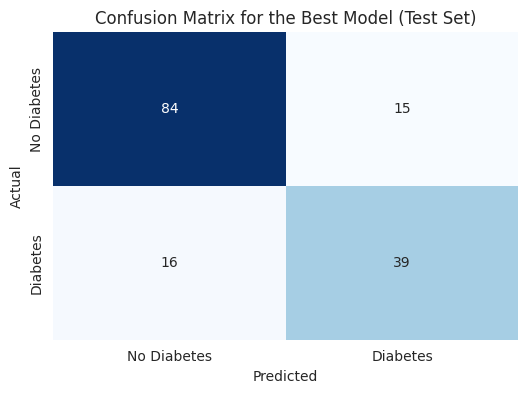

In [203]:
plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix for the Best Model (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()